**PROBLEM STATEMENT: Predicting the  Degree of Regulatory Compliance (DRC) of the Insurers  through  evaluation of complaints resolution system  & Pattern Extraction****************************************************************************************

In [1]:
##STARTING THE CODE PROCESS

In [2]:
##IMPORTING THE LIBRARIES*************************************************************

In [3]:
# Modules to ignore warnings
import warnings               
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import os   
import shutil


import numpy as np    # For array operations
import pandas as pd   # For DataFrames
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt    # For plotting%matplotlib inline
from subprocess import call
import seaborn as sns
from datetime import date


import scipy.stats as sps



from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split
from collections import Counter

import datetime as dt
from datetime import datetime
import time
from datetime import date
import calendar

from collections import Counter
from scipy import stats
from itertools import groupby
from operator import itemgetter

In [4]:
##Reading the data*******************************************************************

In [5]:
Train_data = pd.read_csv('Train-1564659747836.csv', index_col=0)

In [6]:
Train_Complaints=pd.read_csv('Train_Complaints-1564659763354.csv', index_col=0)

In [7]:
Test_data=pd.read_csv('Test-1565162240834.csv', index_col=0)

In [8]:
Test_Complaints=pd.read_csv('Test_Complaints-1565162197608.csv', index_col=0)

In [9]:
print('shape of Train_data:{}\n'.format((Train_data.shape)))
print('shape of Train_Complaints:{}\n'.format((Train_Complaints.shape)))

shape of Train_data:(539, 1)

shape of Train_Complaints:(15565, 14)



In [10]:
print('shape of Test_data:{}\n'.format((Test_data.shape)))
print('shape of Test_Complaints:{}\n'.format((Test_Complaints.shape)))

shape of Test_data:(60, 0)

shape of Test_Complaints:(1927, 14)



In [11]:
##check if train data was read properly
print("Head of Train_data:\n",Train_data.head(3))
print("Head of Test_Complaints:\n",Train_Complaints.head(3))

Head of Train_data:
               DRC
InsurerID        
Insurer5266  poor
Insurer5330  poor
Insurer5405  poor
Head of Test_Complaints:
                                        FileNo DateOfRegistration  \
Company                                                            
Middlesex Mutual Assurance Company     101588         2010-03-28   
Liberty Mutual Fire Insurance Company  101805         2010-04-11   
QBE Insurance Corporation              103398         2010-07-22   

                                      DateOfResolution           Coverage  \
Company                                                                     
Middlesex Mutual Assurance Company          2010-04-13         Homeowners   
Liberty Mutual Fire Insurance Company       2016-11-01         Homeowners   
QBE Insurance Corporation                   2014-06-22  Condo Association   

                                      SubCoverage                  Reason  \
Company                                                    

In [12]:
##check if train data was read properly
print("Head of Test_data:\n",Test_data.head(3))
print("Head of Test_Complaints:\n",Test_Complaints.head(3))

Head of Test_data:
 Empty DataFrame
Columns: []
Index: [Insurer5355, Insurer5491, Insurer5687]
Head of Test_Complaints:
                               FileNo DateOfRegistration DateOfResolution  \
Company                                                                    
Aetna Life Insurance Company  404512         2013-09-09       2014-02-18   
Aetna Life Insurance Company  404512         2013-09-09       2014-02-18   
Aetna Life Insurance Company  404755         2013-09-23       2014-01-02   

                                             Coverage         SubCoverage  \
Company                                                                     
Aetna Life Insurance Company        Individual Health  Health Care Reform   
Aetna Life Insurance Company                      NaN                 NaN   
Aetna Life Insurance Company  Group Disability Income     Long Term Group   

                                              Reason  \
Company                                                


In [13]:
Train_data.describe()

,DRC
count,539
unique,3
top,outstanding
freq,276


In [14]:
Train_Complaints.describe()

,FileNo,RecoveredFromInsurer,ComplaintID
count,15565.000000,15565.000000,15565.000000
mean,666343.643302,1253.019656,354333.728943
std,129338.222318,14983.840980,5077.961449
min,101588.000000,0.000000,345501.000000
25%,600208.000000,0.000000,349968.000000
50%,700676.000000,0.000000,354330.000000
75%,801379.000000,0.000000,358740.000000
max,902189.000000,843825.850000,363104.000000


In [15]:
Test_Complaints.describe()

,FileNo,RecoveredFromInsurer,ComplaintID
count,1927.000000,1927.000000,1927.000000
mean,659091.508044,1537.660701,354115.535029
std,129082.226160,11359.210936,5089.834616
min,404512.000000,0.000000,345544.000000
25%,505331.500000,0.000000,349487.000000
50%,700334.000000,0.000000,354093.000000
75%,800965.000000,0.000000,358472.500000
max,902097.000000,250000.000000,363100.000000


In [16]:
Train_data.head()

,DRC
InsurerID,
Insurer5266,poor
Insurer5330,poor
Insurer5405,poor
Insurer5866,poor
Insurer5283,poor


In [17]:
Test_data.head()

""
InsurerID
Insurer5355
Insurer5491
Insurer5687
Insurer5500
Insurer5268


In [18]:
##MERGING THE DATASETS INTO DATA_TRAIN AND TEST_DATA*************************************

In [19]:
data_train=pd.merge(Train_data, Train_Complaints, on='InsurerID', how='inner')

In [20]:
data_test=pd.merge(Test_data, Test_Complaints, on='InsurerID', how='inner')

In [21]:
print('shape of data_test:{}\n'.format((data_train.shape)))

shape of data_test:(15565, 15)



In [22]:
print('shape of data_test:{}\n'.format((data_test.shape)))

shape of data_test:(1927, 14)



In [23]:
data_train.head()

,InsurerID,DRC,FileNo,DateOfRegistration,DateOfResolution,Coverage,SubCoverage,Reason,SubReason,EnforcementAction,Conclusion,RecoveredFromInsurer,ResolutionStatus,ComplaintID,State
0,Insurer5266,poor,403737,2013-07-25,2014-05-20,Exchange-Individual Hlth,No SubCov - AH,Marketing/Sales,Discontinuation & Replmnt,Claim Paid With Interest,Justified,38220.25,Closed,345537,Connecticut
1,Insurer5266,poor,403737,2013-07-25,2014-05-20,NaN,NaN,Marketing/Sales,Discontinuation & Replmnt,Claim Paid With Interest,Justified,38220.25,Closed,345539,Connecticut
2,Insurer5266,poor,405258,2013-10-24,2014-02-05,NaN,NaN,Unfair Claims Practice,Denial of Claim,Claim Paid With Interest,Justified,13.00,Closed,345585,Connecticut
3,Insurer5266,poor,405258,2013-10-24,2014-02-05,Individual Health,No SubCov - AH,Unfair Claims Practice,Denial of Claim,Claim Paid With Interest,Justified,13.00,Closed,345586,Connecticut
4,Insurer5266,poor,405979,2013-12-04,2014-02-19,Group Health,MRI,Statute Violation,No Subreason,Corrective Action,Justified,136808.00,Closed,345657,Connecticut


In [24]:
data_test.head()

,InsurerID,FileNo,DateOfRegistration,DateOfResolution,Coverage,SubCoverage,Reason,SubReason,EnforcementAction,Conclusion,RecoveredFromInsurer,ResolutionStatus,ComplaintID,State
0,Insurer5355,406310,2013-12-30,2014-02-05,Individual Long Term Care,Partnership,Unfair Claims Practice,Claim Procedure,Claim Paid With Interest,Justified,27325.73,Closed,345815,Connecticut
1,Insurer5355,406310,2013-12-30,2014-02-05,NaN,NaN,Unfair Claims Practice,Claim Procedure,Claim Paid With Interest,Justified,27325.73,Closed,345822,Connecticut
2,Insurer5355,500646,2014-02-13,2014-03-02,NaN,NaN,Underwriting,Cancellation,Furnished Information,Furnished Information,0.00,Closed,346286,Connecticut
3,Insurer5355,500646,2014-02-13,2014-03-02,Individual Long Term Care,No SubCov - AH,Underwriting,Cancellation,Furnished Information,Furnished Information,0.00,Closed,346289,Connecticut
4,Insurer5355,500853,2014-02-23,2014-03-17,Individual Life,Whole Life,Underwriting,Refusal to Insure,Company Position Upheld,Unjustified,0.00,Closed,346390,Connecticut


In [25]:
data_train.dtypes

InsurerID                object
DRC                      object
FileNo                    int64
DateOfRegistration       object
DateOfResolution         object
Coverage                 object
SubCoverage              object
Reason                   object
SubReason                object
EnforcementAction        object
Conclusion               object
RecoveredFromInsurer    float64
ResolutionStatus         object
ComplaintID               int64
State                    object
dtype: object

In [26]:
data_test.dtypes

InsurerID                object
FileNo                    int64
DateOfRegistration       object
DateOfResolution         object
Coverage                 object
SubCoverage              object
Reason                   object
SubReason                object
EnforcementAction        object
Conclusion               object
RecoveredFromInsurer    float64
ResolutionStatus         object
ComplaintID               int64
State                    object
dtype: object

In [27]:
##PREPROCESSING***********************************************************************

##Replacing empty space with nan values

In [28]:
data_train= data_train.replace(r'^\s+$', np.nan, regex=True)

In [29]:
data_test= data_test.replace(r'^\s+$', np.nan, regex=True)

In [30]:
#Replacing empty space with nan values***************************************

In [31]:
data_train[data_train.duplicated(['InsurerID'])==True].sort_values('InsurerID')

,InsurerID,DRC,FileNo,DateOfRegistration,DateOfResolution,Coverage,SubCoverage,Reason,SubReason,EnforcementAction,Conclusion,RecoveredFromInsurer,ResolutionStatus,ComplaintID,State
11507,Insurer5252,outstanding,505530,2014-12-08,2015-01-26,Auto,NaN,Underwriting,Cancellation,Cancellation Upheld,Unjustified,0.00,Closed,349603,Connecticut
11517,Insurer5252,outstanding,705302,2016-11-22,2017-01-03,Auto Physical Damage,NaN,Unfair Claims Practice,Denial of Claim,Contract Provision,Unjustified,0.00,Closed,357473,Connecticut
11516,Insurer5252,outstanding,705320,2016-11-22,2016-12-07,Auto,NaN,Premium and Rating,Excessive Charges,Company Position Upheld,Unjustified,0.00,Closed,357462,Connecticut
11515,Insurer5252,outstanding,701892,2016-04-21,2016-05-02,Auto,NaN,Underwriting,Non-Renewal,Non-Renewal Upheld,Unjustified,0.00,Closed,355117,Connecticut
11514,Insurer5252,outstanding,604954,2015-10-28,2015-11-03,Auto,NaN,Underwriting,Non-Renewal,Non-Renewal Upheld,Unjustified,0.00,Closed,353186,Connecticut
11513,Insurer5252,outstanding,603653,2015-08-08,2015-09-07,Auto Physical Damage,NaN,Unfair Claims Practice,Unsatisfactory Offer,Refer To Appraisal,Unjustified,0.00,Closed,352292,Connecticut
11512,Insurer5252,outstanding,603653,2015-08-08,2015-09-07,Auto Physical Damage,NaN,Unfair Claims Practice,Claim Delays,Refer To Appraisal,Unjustified,0.00,Closed,352291,Connecticut
11511,Insurer5252,outstanding,600356,2015-01-26,2015-02-10,NaN,NaN,Underwriting,Other [Enter Sub-Reason],Satisfactory Explanation,Unjustified,0.00,Closed,350069,Connecticut
11510,Insurer5252,outstanding,600356,2015-01-26,2015-02-10,Auto,NaN,Underwriting,Other [Enter Sub-Reason],Satisfactory Explanation,Unjustified,0.00,Closed,350068,Connecticut
11509,Insurer5252,outstanding,600004,2015-01-04,2015-01-13,Auto Medical Payment,NaN,Unfair Claims Practice,Denial of Claim,Company Position Upheld,Unjustified,0.00,Closed,349838,Connecticut


In [32]:
data_test[data_test.duplicated(['InsurerID'])==True].sort_values('InsurerID')

,InsurerID,FileNo,DateOfRegistration,DateOfResolution,Coverage,SubCoverage,Reason,SubReason,EnforcementAction,Conclusion,RecoveredFromInsurer,ResolutionStatus,ComplaintID,State
938,Insurer5268,705297,2016-11-21,2016-12-04,Group Health,Behavl Hlth/Subst Abuse,Unfair Claims Practice,Provider Contract Issue,Claim Settled,Furnished Information,83.88,Closed,357457,Connecticut
758,Insurer5268,505522,2014-12-08,2014-12-29,Group Life,Term Life,Unfair Claims Practice,Denial of Claim,Company Position Upheld,Unjustified,0.00,Closed,349604,Connecticut
759,Insurer5268,505563,2014-12-09,2015-01-28,Group Health,Preventative,Unfair Claims Practice,Unsatisfactory Settlement,Additional Money Received,Justified,8.00,Closed,349623,Connecticut
760,Insurer5268,505595,2014-12-10,2014-12-29,Group Disability Income,Short Term Group,Unfair Claims Practice,Claim Delays,Furnished Information,Furnished Information,0.00,Closed,349659,Connecticut
761,Insurer5268,505710,2014-12-17,2015-01-13,NaN,NaN,Utilization Review,Medical Necessity,Coverage Granted,Furnished Information,0.00,Closed,349728,Connecticut
762,Insurer5268,505710,2014-12-17,2015-01-13,Individual Health,Other,Utilization Review,Medical Necessity,Coverage Granted,Furnished Information,0.00,Closed,349729,Connecticut
763,Insurer5268,505730,2014-12-21,2015-01-05,Group Health,Preventative,Unfair Claims Practice,CPT Code Issue,Furnished Information,Furnished Information,0.00,Closed,349736,Connecticut
764,Insurer5268,505758,2014-12-22,2015-01-25,Individual Health,In-Patient,Utilization Review,Time Delay,Claim Paid With Interest,Justified,24682.90,Closed,349746,Connecticut
765,Insurer5268,505758,2014-12-22,2015-01-25,NaN,NaN,Utilization Review,Time Delay,Claim Paid With Interest,Justified,24682.90,Closed,349760,Connecticut
766,Insurer5268,600024,2015-01-05,2015-01-20,Group Health,Prescription,Unfair Claims Practice,Claim Procedure,Furnished Information,Furnished Information,0.00,Closed,349846,Connecticut


In [33]:
data_train.shape

(15565, 15)

In [34]:
data_test.shape

(1927, 14)

In [35]:
##finding the repeated InsurerID in data set 
data_train.InsurerID.duplicated().sum()

15026

In [36]:
##finding the repeated InsurerID in data set 
data_test.InsurerID.duplicated().sum()

1867

In [37]:
##checking individual InsurerID occuring in data set
pd.value_counts(data_train['InsurerID'].values)

Insurer5330    1954
Insurer5406     622
Insurer5281     564
Insurer5490     401
Insurer5404     394
Insurer5866     386
Insurer5405     372
Insurer5733     300
Insurer5283     292
Insurer5732     287
Insurer5700     281
Insurer5797     244
Insurer5598     240
Insurer5799     207
Insurer5546     200
Insurer5387     190
Insurer5763     190
Insurer5790     182
Insurer5826     182
Insurer5589     171
Insurer5291     171
Insurer5846     165
Insurer5326     160
Insurer5836     138
Insurer5620     133
Insurer5656     119
Insurer5875     117
Insurer5874     117
Insurer5482     115
Insurer5619     113
               ... 
Insurer5294       1
Insurer5847       1
Insurer5778       1
Insurer5631       1
Insurer5492       1
Insurer5352       1
Insurer5434       1
Insurer5457       1
Insurer5278       1
Insurer5705       1
Insurer5737       1
Insurer5456       1
Insurer5304       1
Insurer5475       1
Insurer5466       1
Insurer5363       1
Insurer5302       1
Insurer5628       1
Insurer5313       1


In [38]:
##checking individual InsurerID occuring in data set
pd.value_counts(data_test['InsurerID'].values)

Insurer5268    388
Insurer5491    376
Insurer5365    127
Insurer5586    123
Insurer5500    110
Insurer5355     94
Insurer5549     92
Insurer5850     54
Insurer5539     48
Insurer5488     45
Insurer5289     40
Insurer5662     37
Insurer5543     33
Insurer5307     33
Insurer5704     30
Insurer5687     25
Insurer5516     22
Insurer5610     22
Insurer5410     20
Insurer5552     17
Insurer5644     14
Insurer5374     14
Insurer5848     11
Insurer5754     10
Insurer5351     10
Insurer5673     10
Insurer5865      9
Insurer5443      8
Insurer5816      8
Insurer5287      7
Insurer5453      7
Insurer5895      6
Insurer5867      6
Insurer5364      6
Insurer5401      5
Insurer5761      5
Insurer5558      5
Insurer5373      5
Insurer5269      4
Insurer5792      4
Insurer5305      4
Insurer5667      3
Insurer5501      3
Insurer5532      3
Insurer5771      3
Insurer5511      3
Insurer5470      2
Insurer5643      2
Insurer5382      2
Insurer5789      2
Insurer5312      1
Insurer5581      1
Insurer5680 

In [39]:
##sorting the dates in descending order to get the top get insurerID

In [40]:
data_train.sort_values(by=['DateOfRegistration'], inplace=True, ascending=False)

In [41]:
data_train

,InsurerID,DRC,FileNo,DateOfRegistration,DateOfResolution,Coverage,SubCoverage,Reason,SubReason,EnforcementAction,Conclusion,RecoveredFromInsurer,ResolutionStatus,ComplaintID,State
14641,Insurer5324,outstanding,902189,2018-05-14,2018-05-15,Condo Association,NaN,Unfair Claims Practice,Denial of Claim,Company Position Upheld,Unjustified,0.00,Closed,363104,Connecticut
3100,Insurer5283,poor,902189,2018-05-14,2018-05-15,Condo Association,NaN,Unfair Claims Practice,Unsatisfactory Settlement,Company Position Upheld,Unjustified,0.00,Closed,363103,Connecticut
13619,Insurer5826,poor,902167,2018-05-13,2018-05-15,Individual Long Term Care,Long Term Individual,Premium and Rating,Premium/Rate Increase,Rate Increase Explained,Furnished Information,0.00,Closed,363102,Connecticut
15398,Insurer5743,outstanding,902137,2018-05-10,2018-05-15,Individual Life,Whole Life,Marketing/Sales,Policy Service Delay,Complaint Withdrawn,No Action Necessary,0.00,Closed,363101,Connecticut
15326,Insurer5595,outstanding,902080,2018-05-08,2018-05-13,Individual Life,Whole Life,Marketing/Sales,Policy Service,Furnished Information,Furnished Information,0.00,Closed,363099,Connecticut
10640,Insurer5827,outstanding,902074,2018-05-08,2018-05-09,Individual Long Term Care,No SubCov - AH,Premium and Rating,Premium/Rate Increase,Rate Increase Explained,Furnished Information,0.00,Closed,363098,Connecticut
11388,Insurer5620,average,902064,2018-05-08,2018-05-09,Individual Long Term Care,Long Term Individual,Premium and Rating,Premium/Rate Increase,Rate Increase Explained,Furnished Information,0.00,Closed,363097,Connecticut
13618,Insurer5826,poor,902032,2018-05-06,2018-05-06,Individual Long Term Care,Long Term Individual,Premium and Rating,Premium/Rate Increase,Rate Increase Explained,Furnished Information,0.00,Closed,363093,Connecticut
4911,Insurer5762,poor,902035,2018-05-06,2018-05-15,Homeowners,NaN,Unfair Claims Practice,Unsatisfactory Offer,Refer To Appraisal,Unjustified,0.00,Closed,363094,Connecticut
3916,Insurer5490,average,902001,2018-05-03,NaN,Auto,NaN,Premium and Rating,Premium/Notice,Company Position Upheld,Unjustified,0.00,Open,363092,Connecticut


In [42]:
data_test.sort_values(by=['DateOfRegistration'], inplace=True, ascending=False)

In [43]:
data_test

,InsurerID,FileNo,DateOfRegistration,DateOfResolution,Coverage,SubCoverage,Reason,SubReason,EnforcementAction,Conclusion,RecoveredFromInsurer,ResolutionStatus,ComplaintID,State
1206,Insurer5365,902097,2018-05-09,2018-05-15,Individual Long Term Care,No SubCov - AH,Premium and Rating,Premium/Rate Increase,Furnished Information,Furnished Information,0.00,Closed,363100,Connecticut
1204,Insurer5365,902063,2018-05-08,2018-05-09,NaN,NaN,Premium and Rating,Premium/Rate Increase,Rate Increase Explained,Furnished Information,0.00,Closed,363095,Connecticut
1205,Insurer5365,902063,2018-05-08,2018-05-09,Individual Long Term Care,Partnership,Premium and Rating,Premium/Rate Increase,Rate Increase Explained,Furnished Information,0.00,Closed,363096,Connecticut
992,Insurer5268,901959,2018-04-30,2018-05-15,Group Disability Income,No SubCov - AH,Unfair Claims Practice,Claim Delays,Coverage Granted,Furnished Information,3560.00,Closed,363086,Connecticut
1036,Insurer5305,901912,2018-04-26,2018-05-10,Other [Enter Coverage],NaN,Unfair Claims Practice,Unsatisfactory Settlement,Company Position Upheld,Unjustified,0.00,Closed,363075,Connecticut
990,Insurer5268,901900,2018-04-25,NaN,Group Health,Autism,Unfair Claims Practice,Eligibility of Provider,Furnished Information,Furnished Information,0.00,Open,363062,Connecticut
991,Insurer5268,901900,2018-04-25,NaN,NaN,NaN,Unfair Claims Practice,Eligibility of Provider,Furnished Information,Furnished Information,0.00,Open,363064,Connecticut
1753,Insurer5662,901804,2018-04-22,2018-05-08,Homeowners,NaN,Unfair Claims Practice,Denial of Claim,Contract Provision,Unjustified,0.00,Closed,363039,Connecticut
1345,Insurer5488,901762,2018-04-16,2018-05-08,NaN,NaN,Unfair Claims Practice,Claim Procedure,Company Position Upheld,Unjustified,0.00,Closed,363018,Connecticut
1344,Insurer5488,901762,2018-04-16,2018-05-08,Auto Liability,NaN,Unfair Claims Practice,Claim Procedure,Company Position Upheld,Unjustified,0.00,Closed,363017,Connecticut


In [44]:
##droping the duplicate *InsurerID* based on the dateof registartion....
##because the previous ones will be discarded as they have no value and last followed up on will be kept***

In [45]:
data_train.drop_duplicates(subset ="InsurerID", 
                     keep = 'last', inplace = True)

In [46]:
data_train

,InsurerID,DRC,FileNo,DateOfRegistration,DateOfResolution,Coverage,SubCoverage,Reason,SubReason,EnforcementAction,Conclusion,RecoveredFromInsurer,ResolutionStatus,ComplaintID,State
14652,Insurer5454,outstanding,901895,2018-04-25,2018-05-15,Fidelity and Surety,NaN,Unfair Claims Practice,Denial of Claim,Company Position Upheld,Unjustified,0.00,Closed,363067,Connecticut
5869,Insurer5375,average,901564,2018-04-03,2018-04-05,Other [Enter Coverage],NaN,FOI Inquiry,No Subreason,Furnished Information,No Action Necessary,0.00,Closed,362895,Connecticut
15226,Insurer5778,outstanding,901174,2018-03-12,2018-03-27,Condo Association,NaN,Unfair Claims Practice,Claim Procedure,Company Position Upheld,Unjustified,0.00,Closed,362663,Connecticut
15225,Insurer5519,outstanding,901018,2018-03-01,2018-03-25,NaN,NaN,Marketing/Sales,Misrepresentation,Corrective Action,Unjustified,0.00,Closed,362561,Connecticut
15179,Insurer5900,poor,900877,2018-02-22,NaN,Professional Liability,NaN,Unfair Claims Practice,Denial of Claim,Contract Provision,Unjustified,0.00,Re-Opened,362486,Connecticut
15348,Insurer5628,average,900827,2018-02-20,2018-04-03,Commercial Fire,NaN,Unfair Claims Practice,Denial of Claim,Contract Provision,Unjustified,0.00,Closed,362455,Connecticut
15077,Insurer5479,outstanding,900849,2018-02-20,2018-03-14,General Liability,NaN,Unfair Claims Practice,Claim Delays,Claim Settled,Unjustified,0.00,Closed,362452,Connecticut
12113,Insurer5701,average,900777,2018-02-15,2018-03-11,Homeowners,NaN,Unfair Claims Practice,Denial of Claim,Claim Settled,Justified,9550.00,Closed,362407,Connecticut
11493,Insurer5395,outstanding,900725,2018-02-14,2018-02-26,Commercial Auto,NaN,Unfair Claims Practice,Denial of Claim,Contract Provision,Unjustified,0.00,Closed,362400,Connecticut
14538,Insurer5420,outstanding,900677,2018-02-11,2018-03-12,Condo Unit Owner,NaN,Unfair Claims Practice,Claim Procedure,Company Position Upheld,Unjustified,0.00,Closed,362357,Connecticut


In [47]:
##droping the duplicate us id based on the dateof registartion....
##because the previous ones will be discarded as they have no value and last followed up on will be kept

data_test.drop_duplicates(subset ="InsurerID", 
                     keep = 'last', inplace = True)

In [48]:
data_test

,InsurerID,FileNo,DateOfRegistration,DateOfResolution,Coverage,SubCoverage,Reason,SubReason,EnforcementAction,Conclusion,RecoveredFromInsurer,ResolutionStatus,ComplaintID,State
1900,Insurer5643,901365,2018-03-22,2018-04-02,Homeowners,NaN,Unfair Claims Practice,Unsatisfactory Offer,Record Only,No Action Necessary,0.00,Closed,362771,Connecticut
1868,Insurer5303,803045,2017-06-29,2017-07-26,Commercial Auto,NaN,Unfair Claims Practice,Diminished Value,Claim Settled,Unjustified,750.00,Closed,359867,Connecticut
1869,Insurer5312,802337,2017-05-17,2017-05-30,Individual Life,Other,Unfair Claims Practice,Unsatisfactory Settlement,Company Position Upheld,Unjustified,0.00,Closed,359398,Connecticut
1898,Insurer5470,800684,2017-02-09,2017-03-06,Individual Life,Whole Life,Premium and Rating,Other [Enter Sub-Reason],Cancellation Withdrawn,No Action Necessary,0.00,Closed,358302,Connecticut
1926,Insurer5581,705600,2016-12-12,2017-01-11,General Liability,NaN,Underwriting,Non-Renewal,Non-Renewal Upheld,Unjustified,0.00,Closed,357644,Connecticut
1848,Insurer5501,704435,2016-10-02,2016-10-12,Individual Long Term Care,No SubCov - AH,Unfair Claims Practice,Contract Provision,Furnished Information,Furnished Information,0.00,Closed,356856,Connecticut
1419,Insurer5543,703813,2016-08-21,2016-08-21,A & H,No SubCov - AH,Unfair Claims Practice,Provider Contract Issue,Record Only,No Action Necessary,0.00,Closed,356449,Connecticut
1897,Insurer5577,703180,2016-07-13,2016-07-13,Individual Long Term Care,No SubCov - AH,Premium and Rating,Premium/Rate Increase,Rate Increase Explained,Furnished Information,0.00,Closed,356040,Connecticut
1861,Insurer5287,702035,2016-05-01,2016-05-18,Professional Liability,NaN,Premium and Rating,Premium Refund Delay,Premium Refund,Questionable,0.00,Closed,355210,Connecticut
1896,Insurer5442,700815,2016-02-17,2016-04-04,Auto Liability,NaN,Unfair Claims Practice,Claim Delays,Company Position Upheld,Unjustified,0.00,Closed,354404,Connecticut


In [49]:
data_train.shape

(539, 15)

In [50]:
data_test.shape

(60, 14)

In [51]:
data_train.isnull().sum().sum()

448

In [52]:
data_test.isnull().sum().sum()

48

In [53]:
data_train.drop(['State'], axis=1, inplace=True)
data_test.drop(['State'], axis=1, inplace=True)

In [54]:
data_train['Coverage']=data_train['Coverage'].fillna(0)
data_test['Coverage']=data_test['Coverage'].fillna(0)

In [55]:
data_train['DateOfResolution']=data_train['DateOfResolution'].fillna(0)
data_test['DateOfResolution']=data_test['DateOfResolution'].fillna(0)

In [56]:
data_train=data_train.replace('Unknown','NaN',regex=True)
data_test=data_test.replace('Unknown','NaN',regex=True)

In [57]:
data_train=data_train.replace('Other','1',regex=True)
data_test=data_test.replace('Other','1',regex=True)

In [58]:
data_train.DRC.value_counts()

outstanding    276
average        162
poor           101
Name: DRC, dtype: int64

In [59]:
data_train.DRC.value_counts()

outstanding    276
average        162
poor           101
Name: DRC, dtype: int64

In [60]:
data_train.Coverage.value_counts()

Auto Liability               87
Individual Life              59
0                            58
Homeowners                   57
Commercial Multi-Peril       33
General Liability            26
Auto                         18
Worker's Compensation        15
Auto Physical Damage         15
1 [Enter Coverage]           12
Group Disability Income      12
Commercial Auto              12
Group Health                 12
Individual Annuity           12
Group Life                   11
Condo Association            10
Title Insurance               7
Individual Long Term Care     7
Fidelity and Surety           6
Dental                        6
Ind Disability Income         6
Professional Liability        6
Travel Insurance              5
Individual Health             5
Extended Warranty(1)          4
Auto Warranty                 3
Group/Association Trust       3
Exchange-Individual Hlth      3
Personal Umbrella             3
Tenant Homeowners             2
Limited Benefit Health        2
NaN     

In [61]:
data_test.Coverage.value_counts()

0                            9
Homeowners                   9
Individual Life              6
Auto Liability               6
Individual Long Term Care    4
General Liability            3
NaN                          2
Worker's Compensation        2
Individual Health            2
Auto Medical Payment         2
Commercial Auto              2
Tenant Homeowners            1
Short Term Medical           1
Group Disability Income      1
Professional Liability       1
Auto Physical Damage         1
Ind Disability Income        1
Dental                       1
Group/Association Trust      1
A & H                        1
Auto                         1
Group Long Term Care         1
Commercial Multi-Peril       1
Watercraft                   1
Name: Coverage, dtype: int64

In [62]:
data_train.SubReason.value_counts()

Denial of Claim              114
Claim Delays                  92
Claim Procedure               32
Excessive Charges             30
Unsatisfactory Settlement     29
Producer Handling             23
Unsatisfactory Offer          23
Premium/Rate Increase         19
Non-Renewal                   18
Premium Refund Delay          15
Cancellation                  14
Misleading Advertising        11
Comparative Negligence        10
No Subreason                   9
Policy Service Delay           9
Audit                          8
Contract Provision             8
Misrepresentation              7
No Coverage/Premium Paid       6
Actual Cash Value Dispute      6
Policy Service                 5
Subrogation                    5
Premium/Notice                 5
Refusal to Insure              4
Loss of Use                    4
CPT Code Issue                 4
Underwriting Delays            3
After Mrkt Prts/Unsat Set      3
Unfair Discrimination          3
Carrier Never Rec'd Claim      2
Diminished

In [63]:
data_test.SubReason.value_counts()

Denial of Claim              9
Claim Delays                 8
Claim Procedure              7
Premium/Rate Increase        4
Unsatisfactory Settlement    4
Audit                        2
Non-Renewal                  2
Cancellation                 2
Policy Service Delay         1
Contract Provision           1
Carrier Never Rec'd Claim    1
Unsatisfactory Offer         1
Diminished Value             1
Comparative Negligence       1
Unapproved Form              1
Misleading Advertising       1
Pre-Existing Condition       1
Premium/Notice               1
Actual Cash Value Dispute    1
Excessive Charges            1
Provider Contract Issue      1
Premium Refund Delay         1
Refusal to Insure            1
Unprofessional Conduct       1
1 [Enter Sub-Reason]         1
Duplicate Coverage           1
Policy Service               1
No Coverage/Premium Paid     1
Policy Issue Delay           1
Discontinuation & Replmnt    1
Name: SubReason, dtype: int64

In [64]:
data_train.EnforcementAction.value_counts()

Company Position Upheld       179
Contract Provision             91
Claim Settled                  58
Corrective Action              54
Refer-Judicial/Attorney        33
Furnished Information          28
Premium Refund                 10
Complaint Withdrawn             8
Cancellation Upheld             8
Additional Money Received       8
Non-Renewal Upheld              8
Satisfactory Explanation        7
Non-Renewal Rescinded           6
Enter Arbitration               5
No Cause For Action             5
Coverage Extended               4
Claim Paid With Interest        3
Pol Restored/Reinstated         3
Refer To Appraisal              3
Cancellation Withdrawn          3
Insufficient Information        2
1 [Enter Disposition]           2
Inter-Company Arbitration       2
Policy Not In Force             2
External Review Info Sent       1
Coverage Granted                1
Record Only                     1
Underwriting Guidelines         1
Rate Increase Explained         1
Provider Issue

In [65]:
data_test.EnforcementAction.value_counts()

Company Position Upheld      13
Contract Provision            8
Corrective Action             7
Furnished Information         7
Refer-Judicial/Attorney       4
Claim Settled                 2
Rate Increase Explained       2
Premium Refund                2
Record Only                   2
Refer To Appraisal            2
Non-Renewal Upheld            1
Satisfactory Explanation      1
Pol Restored/Reinstated       1
Additional Money Received     1
Cancellation Withdrawn        1
Cancellation Upheld           1
Claim Paid With Interest      1
Non-Renewal Rescinded         1
Coverage Extended             1
Insufficient Information      1
No Cause For Action           1
Name: EnforcementAction, dtype: int64

In [66]:
data_train.Conclusion.value_counts()

Unjustified              376
Justified                 65
Furnished Information     62
No Action Necessary       18
Questionable              13
Voluntary Reconsider       5
Name: Conclusion, dtype: int64

In [67]:
data_test.Conclusion.value_counts()

Unjustified              31
Furnished Information    11
Justified                 8
No Action Necessary       5
Questionable              4
Voluntary Reconsider      1
Name: Conclusion, dtype: int64

In [68]:
##inspecting the dataset

In [69]:
def inspect_data(data_train):

    return pd.DataFrame({"Data Type":data_train.dtypes,"No of Levels":data_train.apply(lambda x: x.unique().shape[0],axis=0),
                         "Levels":data_train.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(data_train)

,Data Type,No of Levels,Levels
InsurerID,object,539,['Insurer5454' 'Insurer5375' 'Insurer5778' 'In...
DRC,object,3,['outstanding' 'average' 'poor']
FileNo,int64,524,[901895 901564 901174 901018 900877 900827 900...
DateOfRegistration,object,358,['2018-04-25' '2018-04-03' '2018-03-12' '2018-...
DateOfResolution,object,318,['2018-05-15' '2018-04-05' '2018-03-27' '2018-...
Coverage,object,48,['Fidelity and Surety' '1 [Enter Coverage]' 'C...
SubCoverage,object,27,[nan 'No SubCov - AH' 'Whole Life' 'Term Life'...
Reason,object,8,['Unfair Claims Practice' 'FOI Inquiry' 'Marke...
SubReason,object,44,['Denial of Claim' 'No Subreason' 'Claim Proce...
EnforcementAction,object,31,['Company Position Upheld' 'Furnished Informat...


In [70]:
def inspect_data(data_test):

    return pd.DataFrame({"Data Type":data_test.dtypes,"No of Levels":data_test.apply(lambda x: x.unique().shape[0],axis=0),
                         "Levels":data_test.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(data_test)

,Data Type,No of Levels,Levels
InsurerID,object,60,['Insurer5643' 'Insurer5303' 'Insurer5312' 'In...
FileNo,int64,60,[901365 803045 802337 800684 705600 704435 703...
DateOfRegistration,object,57,['2018-03-22' '2017-06-29' '2017-05-17' '2017-...
DateOfResolution,object,54,['2018-04-02' '2017-07-26' '2017-05-30' '2017-...
Coverage,object,24,['Homeowners' 'Commercial Auto' 'Individual Li...
SubCoverage,object,12,[nan '1' 'Whole Life' 'No SubCov - AH' 'Short ...
Reason,object,4,['Unfair Claims Practice' 'Premium and Rating'...
SubReason,object,30,['Unsatisfactory Offer' 'Diminished Value' 'Un...
EnforcementAction,object,21,['Record Only' 'Claim Settled' 'Company Positi...
Conclusion,object,6,['No Action Necessary' 'Unjustified' 'Furnishe...


# feature engineering

In [71]:
from collections import Counter
get_most_common = lambda values: max(Counter(values).items(), key = lambda x: x[1])[0]

In [72]:
from datetime import datetime

today=datetime.now()
#today=today.strftime("%Y")
data_test['DateOfRegistration'] = pd.to_datetime(data_test['DateOfRegistration'])
#print(X_train['DOJ'].strftime("%Y"))
data_test['DateOfResolution']=round((today-data_test['DateOfRegistration'])/np.timedelta64(1,'Y'))

In [73]:
from datetime import datetime

today=datetime.now()
#today=today.strftime("%Y")
data_train['DateOfRegistration'] = pd.to_datetime(data_train['DateOfRegistration'])
#print(X_train['DOJ'].strftime("%Y"))
data_train['DateOfResolution']=round((today-data_train['DateOfRegistration'])/np.timedelta64(1,'Y'))

In [74]:
complete_reason = data_train.Reason + data_train.SubReason
complete_reason = data_test.Reason + data_test.SubReason

In [75]:
total_coverage=data_train.Coverage + data_train.SubCoverage
total_coverage=data_test.Coverage + data_test.SubCoverage

In [76]:
data_train.drop(['ResolutionStatus', 'Coverage','SubCoverage','Reason','SubReason','DateOfRegistration'],axis=1, inplace=True)
data_test.drop(['ResolutionStatus', 'Coverage','SubCoverage','Reason','SubReason','DateOfRegistration'],axis=1, inplace=True)

In [77]:
data_train.drop(['Conclusion', 'EnforcementAction'],axis=1, inplace=True)
data_test.drop(['Conclusion', 'EnforcementAction'],axis=1, inplace=True)

In [78]:
data_train.isnull().sum().sum()

0

In [79]:
data_test.isnull().sum().sum()

0

In [80]:
data_train.shape

(539, 6)

In [81]:
data_test.shape

(60, 5)

In [82]:
data_test.head()

,InsurerID,FileNo,DateOfResolution,RecoveredFromInsurer,ComplaintID
1900,Insurer5643,901365,2.0,0.0,362771
1868,Insurer5303,803045,2.0,750.0,359867
1869,Insurer5312,802337,3.0,0.0,359398
1898,Insurer5470,800684,3.0,0.0,358302
1926,Insurer5581,705600,3.0,0.0,357644


In [83]:
data_train.head()

,InsurerID,DRC,FileNo,DateOfResolution,RecoveredFromInsurer,ComplaintID
14652,Insurer5454,outstanding,901895,2.0,0.0,363067
5869,Insurer5375,average,901564,2.0,0.0,362895
15226,Insurer5778,outstanding,901174,2.0,0.0,362663
15225,Insurer5519,outstanding,901018,2.0,0.0,362561
15179,Insurer5900,poor,900877,2.0,0.0,362486


In [84]:
data_train.columns

Index(['InsurerID', 'DRC', 'FileNo', 'DateOfResolution',
       'RecoveredFromInsurer', 'ComplaintID'],
      dtype='object')

In [85]:
##replacing the target variables of poor, average and outstanding with 1,2,3

In [86]:
DRC= {'poor': 1, 'average':2,'outstanding':3}
data_train.DRC =[DRC[item] for item in data_train.DRC]

In [87]:
data_train

,InsurerID,DRC,FileNo,DateOfResolution,RecoveredFromInsurer,ComplaintID
14652,Insurer5454,3,901895,2.0,0.00,363067
5869,Insurer5375,2,901564,2.0,0.00,362895
15226,Insurer5778,3,901174,2.0,0.00,362663
15225,Insurer5519,3,901018,2.0,0.00,362561
15179,Insurer5900,1,900877,2.0,0.00,362486
15348,Insurer5628,2,900827,2.0,0.00,362455
15077,Insurer5479,3,900849,2.0,0.00,362452
12113,Insurer5701,2,900777,2.0,9550.00,362407
11493,Insurer5395,3,900725,2.0,0.00,362400
14538,Insurer5420,3,900677,2.0,0.00,362357


In [88]:
data_train.isnull().sum().sum()

0

In [89]:
data_test.isnull().sum().sum()

0

In [90]:
data_train.dtypes

InsurerID                object
DRC                       int64
FileNo                    int64
DateOfResolution        float64
RecoveredFromInsurer    float64
ComplaintID               int64
dtype: object

In [91]:
data_test.dtypes

InsurerID                object
FileNo                    int64
DateOfResolution        float64
RecoveredFromInsurer    float64
ComplaintID               int64
dtype: object

In [92]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 14652 to 3267
Data columns (total 6 columns):
InsurerID               539 non-null object
DRC                     539 non-null int64
FileNo                  539 non-null int64
DateOfResolution        539 non-null float64
RecoveredFromInsurer    539 non-null float64
ComplaintID             539 non-null int64
dtypes: float64(2), int64(3), object(1)
memory usage: 29.5+ KB


In [93]:
##checking the shape of the datasets

In [94]:
data_train.shape

(539, 6)

In [95]:
data_test.shape

(60, 5)

In [96]:
##conversting insureid to float

In [97]:
##merging FINAL datasets***********************************************************************

In [98]:
##columns in train and test are different so aligning them

In [99]:
##PLOTS*******************************************************************

DRC                     1.000000
FileNo                  0.236798
ComplaintID             0.186366
RecoveredFromInsurer   -0.108431
DateOfResolution       -0.205891
Name: DRC, dtype: float64

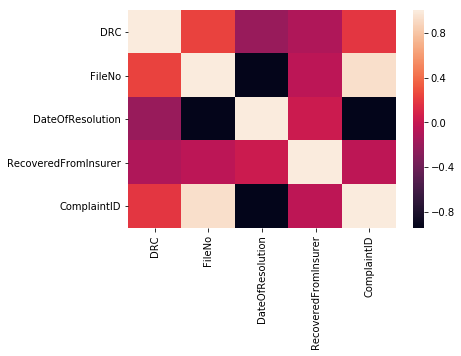

In [100]:
##the correlation between the variables and the target
corr = data_train.corr()
sns.heatmap(corr)
corr['DRC'].sort_values(ascending=False)

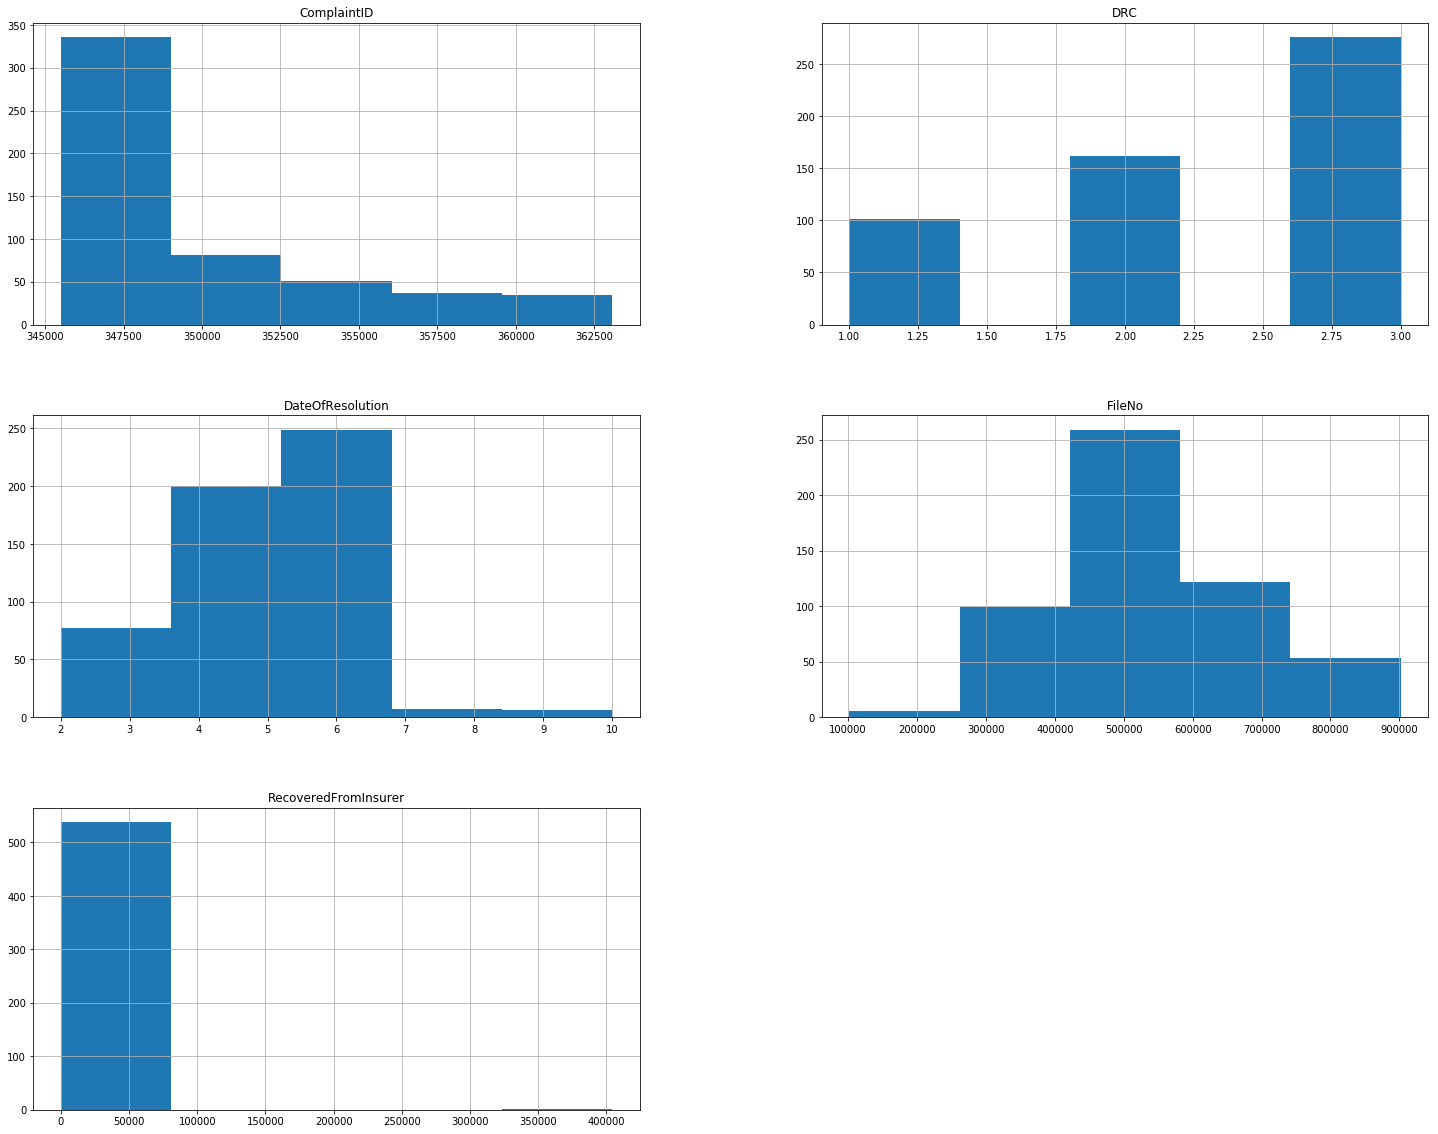

In [101]:
#Hist Plots for finding the counts of the columns in the DataSet
%matplotlib inline
import matplotlib.pyplot as plt
data_train.hist(bins=5, figsize=(25,20))
plt.savefig("attribute_histogram_plots")
plt.show()

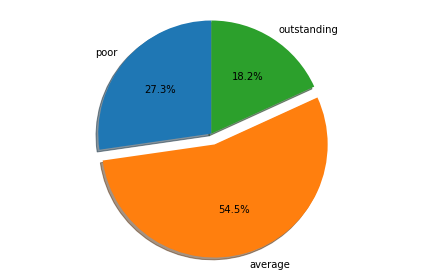

In [102]:
import matplotlib.pyplot as plt

# Pie chart
labels = ['poor','average','outstanding']
sizes = [15, 30, 10]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [103]:
data_train.dtypes

InsurerID                object
DRC                       int64
FileNo                    int64
DateOfResolution        float64
RecoveredFromInsurer    float64
ComplaintID               int64
dtype: object

In [104]:
data_train

,InsurerID,DRC,FileNo,DateOfResolution,RecoveredFromInsurer,ComplaintID
14652,Insurer5454,3,901895,2.0,0.00,363067
5869,Insurer5375,2,901564,2.0,0.00,362895
15226,Insurer5778,3,901174,2.0,0.00,362663
15225,Insurer5519,3,901018,2.0,0.00,362561
15179,Insurer5900,1,900877,2.0,0.00,362486
15348,Insurer5628,2,900827,2.0,0.00,362455
15077,Insurer5479,3,900849,2.0,0.00,362452
12113,Insurer5701,2,900777,2.0,9550.00,362407
11493,Insurer5395,3,900725,2.0,0.00,362400
14538,Insurer5420,3,900677,2.0,0.00,362357


In [105]:
data_test

,InsurerID,FileNo,DateOfResolution,RecoveredFromInsurer,ComplaintID
1900,Insurer5643,901365,2.0,0.00,362771
1868,Insurer5303,803045,2.0,750.00,359867
1869,Insurer5312,802337,3.0,0.00,359398
1898,Insurer5470,800684,3.0,0.00,358302
1926,Insurer5581,705600,3.0,0.00,357644
1848,Insurer5501,704435,3.0,0.00,356856
1419,Insurer5543,703813,3.0,0.00,356449
1897,Insurer5577,703180,3.0,0.00,356040
1861,Insurer5287,702035,4.0,0.00,355210
1896,Insurer5442,700815,4.0,0.00,354404


In [106]:
data_train.dtypes

InsurerID                object
DRC                       int64
FileNo                    int64
DateOfResolution        float64
RecoveredFromInsurer    float64
ComplaintID               int64
dtype: object

In [107]:
y = data_train['DRC']
X_test=data_test
X = data_train.drop('DRC', axis=1)

In [108]:
data_train.dtypes

InsurerID                object
DRC                       int64
FileNo                    int64
DateOfResolution        float64
RecoveredFromInsurer    float64
ComplaintID               int64
dtype: object

In [109]:
data_test.dtypes

InsurerID                object
FileNo                    int64
DateOfResolution        float64
RecoveredFromInsurer    float64
ComplaintID               int64
dtype: object

In [110]:
num_attribute = data_train.select_dtypes(include='number').columns.tolist()
cat_attributes_train = data_train.columns.difference(num_attribute).tolist()

In [111]:
num_attribute = data_test.select_dtypes(include='number').columns.tolist()
cat_attributes_test = data_test.columns.difference(num_attribute).tolist()

In [112]:
x1_train = pd.get_dummies(X)
x1_test = pd.get_dummies(X_test)

In [113]:
x1_train.dtypes

FileNo                     int64
DateOfResolution         float64
RecoveredFromInsurer     float64
ComplaintID                int64
InsurerID_Insurer5252      uint8
InsurerID_Insurer5253      uint8
InsurerID_Insurer5254      uint8
InsurerID_Insurer5255      uint8
InsurerID_Insurer5256      uint8
InsurerID_Insurer5257      uint8
InsurerID_Insurer5259      uint8
InsurerID_Insurer5260      uint8
InsurerID_Insurer5261      uint8
InsurerID_Insurer5262      uint8
InsurerID_Insurer5263      uint8
InsurerID_Insurer5264      uint8
InsurerID_Insurer5265      uint8
InsurerID_Insurer5266      uint8
InsurerID_Insurer5267      uint8
InsurerID_Insurer5270      uint8
InsurerID_Insurer5271      uint8
InsurerID_Insurer5272      uint8
InsurerID_Insurer5273      uint8
InsurerID_Insurer5275      uint8
InsurerID_Insurer5276      uint8
InsurerID_Insurer5278      uint8
InsurerID_Insurer5279      uint8
InsurerID_Insurer5280      uint8
InsurerID_Insurer5281      uint8
InsurerID_Insurer5282      uint8
          

In [114]:
x1_test.dtypes

FileNo                     int64
DateOfResolution         float64
RecoveredFromInsurer     float64
ComplaintID                int64
InsurerID_Insurer5268      uint8
InsurerID_Insurer5269      uint8
InsurerID_Insurer5287      uint8
InsurerID_Insurer5289      uint8
InsurerID_Insurer5303      uint8
InsurerID_Insurer5305      uint8
InsurerID_Insurer5307      uint8
InsurerID_Insurer5312      uint8
InsurerID_Insurer5331      uint8
InsurerID_Insurer5351      uint8
InsurerID_Insurer5355      uint8
InsurerID_Insurer5364      uint8
InsurerID_Insurer5365      uint8
InsurerID_Insurer5373      uint8
InsurerID_Insurer5374      uint8
InsurerID_Insurer5382      uint8
InsurerID_Insurer5401      uint8
InsurerID_Insurer5410      uint8
InsurerID_Insurer5442      uint8
InsurerID_Insurer5443      uint8
InsurerID_Insurer5453      uint8
InsurerID_Insurer5455      uint8
InsurerID_Insurer5470      uint8
InsurerID_Insurer5488      uint8
InsurerID_Insurer5491      uint8
InsurerID_Insurer5500      uint8
          

In [115]:
X_train_aligned, X_test_aligned = x1_train.align(x1_test, join='outer', axis=1, fill_value=0)
print(X_train_aligned.shape)
print(X_test_aligned.shape)

(539, 603)
(60, 603)


In [116]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train_aligned)
x_train.shape

(539, 603)

In [117]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_test=scaler.fit_transform(X_test_aligned)
X_test_aligned.shape

(60, 603)

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train_aligned, y, test_size=0.2, random_state=0)

In [119]:
X.shape

(539, 5)

In [120]:
y.shape

(539,)

In [121]:
y_validation.shape

(108,)

In [122]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio='auto', random_state=1234, k_neighbors=3)
            
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [123]:
y_train_res.shape

(666,)

In [124]:
x_train_res.shape

(666, 603)

In [125]:
y_train.shape

(431,)

In [126]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
def train_metrics(y_train,train_pred):
    print("Train")
   # print(accuracy_score(y_train,train_pred))
    print(f1_score(y_train,train_pred,average= "micro"))
    print(confusion_matrix(y_train,train_pred))
    print(classification_report(y_train,train_pred))

def validation_metrics(y_test,test_pred):
    print("Test")
   # print(accuracy_score(y_test,test_pred))
    print(f1_score(y_test,test_pred,average= "macro"))
    print(confusion_matrix(y_test,test_pred))
    print(classification_report(y_test,test_pred))

In [127]:
from sklearn.linear_model import LogisticRegression
# Model initilization
lr = LogisticRegression()
# Model training
lr.fit(X_train, y_train)
# Model predictions
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_validation)

In [128]:
train_pred =   lr.predict(X_train)
test_pred=lr.predict(X_validation)

In [129]:

train_metrics(train_pred,y_train)
validation_metrics(y_validation,test_pred)

Train
0.5336426914153132
[[  7   2   1]
 [  3   3   1]
 [ 68 126 220]]
             precision    recall  f1-score   support

          1       0.09      0.70      0.16        10
          2       0.02      0.43      0.04         7
          3       0.99      0.53      0.69       414

avg / total       0.95      0.53      0.67       431

Test
0.2517197452229299
[[ 1  2 20]
 [ 1  0 30]
 [ 0  1 53]]
             precision    recall  f1-score   support

          1       0.50      0.04      0.08        23
          2       0.00      0.00      0.00        31
          3       0.51      0.98      0.68        54

avg / total       0.36      0.50      0.35       108



In [130]:
Submission = pd.DataFrame()
Submission["InsurerID"]= data_test["InsurerID"]

In [131]:
test = lr.predict(X_test_aligned)
Submission["DRC"]= test
Submission.to_csv("Submit.csv")

In [132]:
# Model initilization
lr_res = LogisticRegression()
lr_res.fit(x_train_res, y_train_res)
# Model predictions
lr_train_res_pred = lr_res.predict(x_train_res)
lr_test_res_pred = lr_res.predict(X_validation)

print("Train_res")
print(accuracy_score(y_train_res,lr_train_res_pred))
print(confusion_matrix(y_train_res,lr_train_res_pred))
print(classification_report(y_train_res,lr_train_res_pred))

print("Test_res")
print(accuracy_score(y_validation,lr_test_res_pred))
print(confusion_matrix(y_validation,lr_test_res_pred))
print(classification_report(y_validation,lr_test_res_pred))

Train_res
0.42792792792792794
[[191   0  31]
 [160   1  61]
 [129   0  93]]
             precision    recall  f1-score   support

          1       0.40      0.86      0.54       222
          2       1.00      0.00      0.01       222
          3       0.50      0.42      0.46       222

avg / total       0.63      0.43      0.34       666

Test_res
0.3333333333333333
[[19  1  3]
 [20  0 11]
 [37  0 17]]
             precision    recall  f1-score   support

          1       0.25      0.83      0.38        23
          2       0.00      0.00      0.00        31
          3       0.55      0.31      0.40        54

avg / total       0.33      0.33      0.28       108



##Model building

In [133]:
##SINCE THE TARGET VARIABLE IS CATOGORICAL IT IS A LOGISTIC REGRESSION THOUGH WE REPRESENTED THE VALUE OF POOR BY 1 AND AVERAGE BY 2 AND 3 WITH OUTSTANDING DEFICIENT
##THEREFORE I USED LOGISTIC REGRESSION MODEL.

In [134]:
##Importing libraries

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

In [136]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None)

In [137]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_validation)

In [138]:
train_metrics(train_pred,y_train)
validation_metrics(test_pred ,y_validation)

Train
0.5243619489559165
[[  4   4   1]
 [  1   4   3]
 [ 73 123 218]]
             precision    recall  f1-score   support

          1       0.05      0.44      0.09         9
          2       0.03      0.50      0.06         8
          3       0.98      0.53      0.69       414

avg / total       0.94      0.52      0.66       431

Test
0.29374797052578994
[[ 2  0  0]
 [ 0  1  2]
 [21 30 52]]
             precision    recall  f1-score   support

          1       0.09      1.00      0.16         2
          2       0.03      0.33      0.06         3
          3       0.96      0.50      0.66       103

avg / total       0.92      0.51      0.64       108



In [139]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()   ## Instantiating DecisionTree-Classifier
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [140]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_validation)

In [141]:
train_metrics(train_pred,y_train)
validation_metrics(test_pred ,y_validation)

Train
0.5243619489559165
[[  4   4   1]
 [  1   4   3]
 [ 73 123 218]]
             precision    recall  f1-score   support

          1       0.05      0.44      0.09         9
          2       0.03      0.50      0.06         8
          3       0.98      0.53      0.69       414

avg / total       0.94      0.52      0.66       431

Test
0.29374797052578994
[[ 2  0  0]
 [ 0  1  2]
 [21 30 52]]
             precision    recall  f1-score   support

          1       0.09      1.00      0.16         2
          2       0.03      0.33      0.06         3
          3       0.96      0.50      0.66       103

avg / total       0.92      0.51      0.64       108



In [142]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=20, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [143]:
print('Train Accuracy =',clf_gini.score(X_train, y_train))
print('Test Accuracy =',clf_gini.score(X_validation, y_validation))

Train Accuracy = 0.6983758700696056
Test Accuracy = 0.4537037037037037


In [144]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None, feature_names=X_train_aligned.columns, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("clf_gini") 

'clf_gini.pdf'

In [145]:
dt2_entropy = tree.DecisionTreeClassifier(criterion='entropy',max_depth =15)
dt2_entropy.fit(X_train, y_train)
print('Train Accuracy =',dt2_entropy.score(X_train, y_train))
print('Test Accuracy =',dt2_entropy.score(X_validation, y_validation))

Train Accuracy = 0.8677494199535963
Test Accuracy = 0.4722222222222222


In [146]:
dot_data = tree.export_graphviz(dt2_entropy, out_file=None,feature_names=X_train_aligned.columns,filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("dt2_entropy_maxdept15") 

'dt2_entropy_maxdept15.pdf'

In [147]:
dt3_fraction15 = tree.DecisionTreeClassifier(criterion='entropy',max_depth =15, min_weight_fraction_leaf=0.11)
dt3_fraction15.fit(X_train, y_train)
print('Train Accuracy =',dt3_fraction15.score(X_train, y_train))
print('Test Accuracy =',dt3_fraction15.score(X_validation, y_validation))

Train Accuracy = 0.54292343387471
Test Accuracy = 0.5277777777777778


In [148]:
dot_data = tree.export_graphviz(dt3_fraction15, out_file=None,feature_names=X_train_aligned.columns,filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("dt3_fraction15")

'dt3_fraction15.pdf'

In [149]:
dt4_maxleaf9 = tree.DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=9)
dt4_maxleaf9.fit(X_train, y_train)
print('Train Accuracy =',dt4_maxleaf9.score(X_train, y_train))
print('Test Accuracy =',dt4_maxleaf9.score(X_validation, y_validation))

Train Accuracy = 0.580046403712297
Test Accuracy = 0.5370370370370371


In [150]:
dot_data = tree.export_graphviz(dt4_maxleaf9, out_file=None,feature_names=X_train_aligned.columns,filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("dt4_maxleaf9")

'dt4_maxleaf9.pdf'

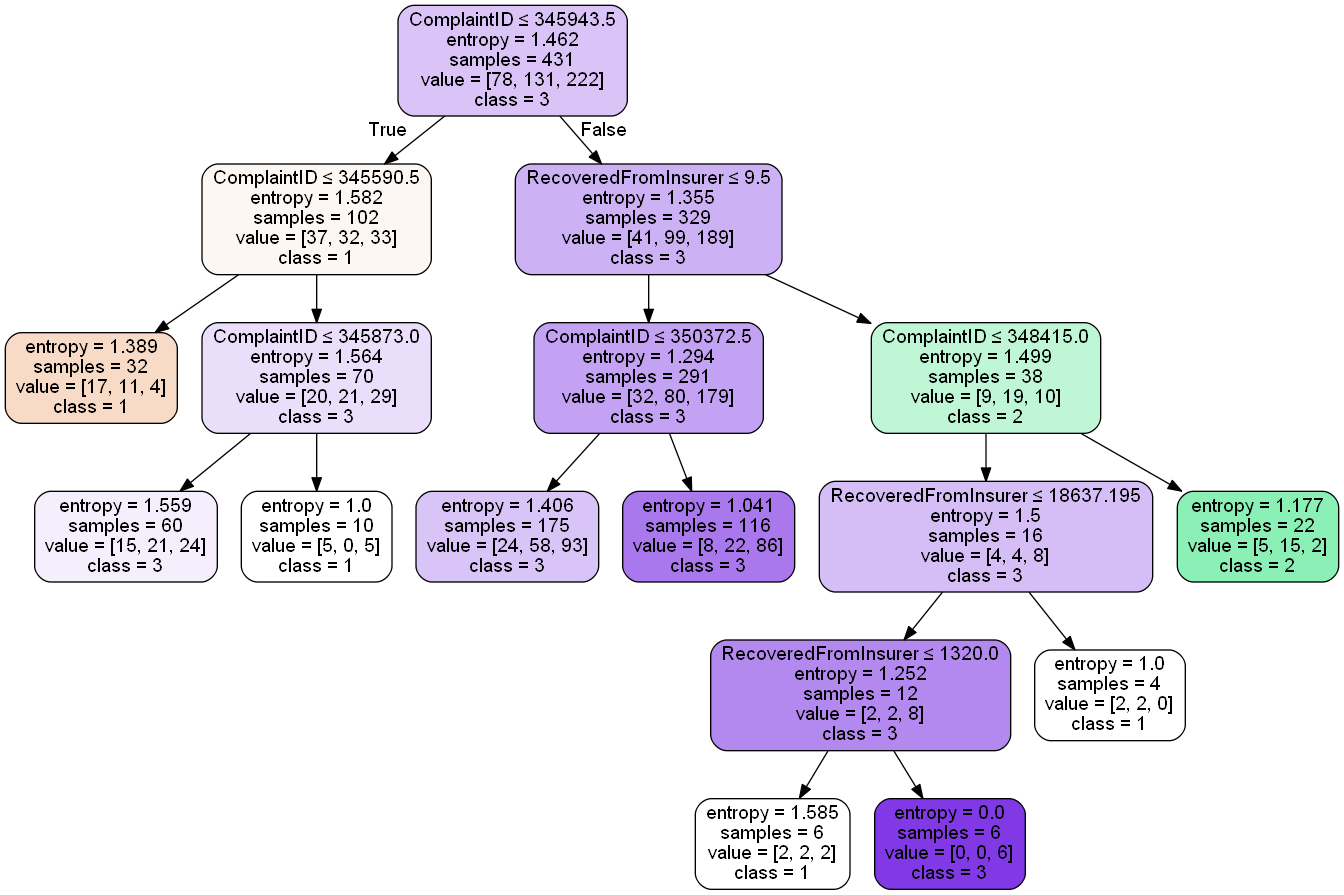

In [151]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt4_maxleaf9, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=X_test_aligned.columns,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('y_train.png')
Image(graph.create_png())

In [152]:
Df=data_train.loc[data_train["RecoveredFromInsurer"] > 5000,:]

In [153]:
Df.tail(20)

,InsurerID,DRC,FileNo,DateOfResolution,RecoveredFromInsurer,ComplaintID
7297,Insurer5259,2,700431,4.0,5935.46,354160
15228,Insurer5899,2,604474,4.0,18174.38,352859
14976,Insurer5770,2,601428,5.0,58467.02,350829
15399,Insurer5847,2,504919,5.0,9750.00,349225
13419,Insurer5342,3,503746,5.0,12839.46,348414
14833,Insurer5383,2,503731,5.0,60000.00,348412
4180,Insurer5592,1,502973,5.0,28832.00,347886
9341,Insurer5429,3,501935,6.0,7006.24,347163
14961,Insurer5521,3,501752,6.0,14000.00,347023
12198,Insurer5725,1,501434,6.0,23274.39,346819


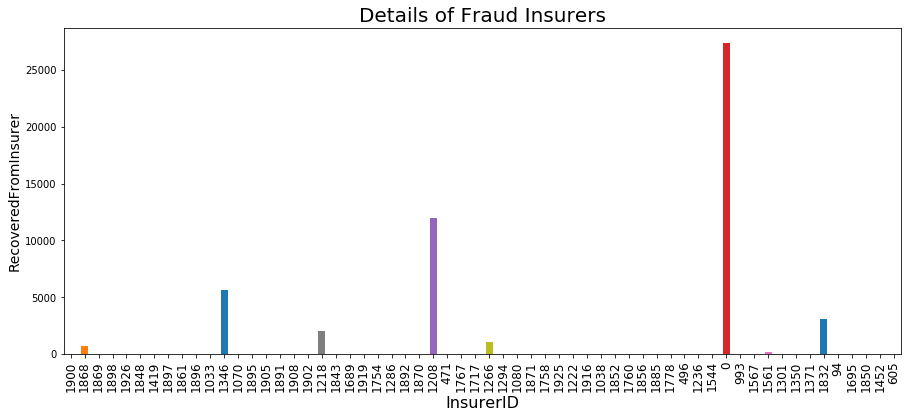

In [154]:

data_test['RecoveredFromInsurer'].plot(kind='bar',figsize=(15,6))

#loc,labels=plt.yticks()
#plt.yticks(loc,loc/1e9,fontsize=24)##set loc and label
plt.ylabel('RecoveredFromInsurer',fontsize=14)
plt.xlabel('InsurerID',fontsize=16)
plt.xticks(fontsize=12)
plt.title('Details of Fraud Insurers',fontsize=20)
plt.show()

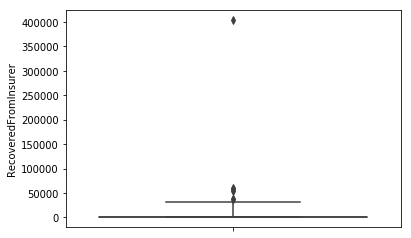

In [155]:
data_train["RecoveredFromInsurer"].describe()

ax = sns.boxplot(y = data_train["RecoveredFromInsurer"],whis=[1,99.00])

PLOTTING THE LEARNING CURVE TO FIND OUT THE VARIANCE IN THE TRAIN DATA AND TEST DATA

In [156]:
#!pip install mlxtend  
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
#from mlxtend.data import iris_data
from mlxtend.preprocessing import shuffle_arrays_unison
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

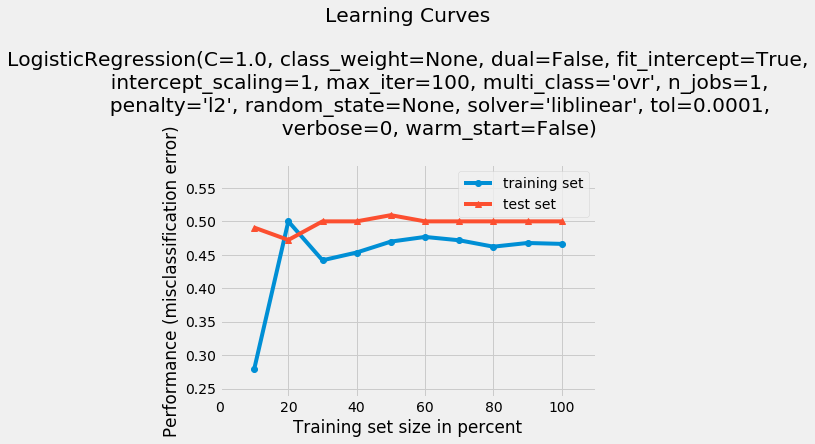

In [157]:
plot_learning_curves(X_train, y_train, X_validation,y_validation,clf=lr)
plt.show()

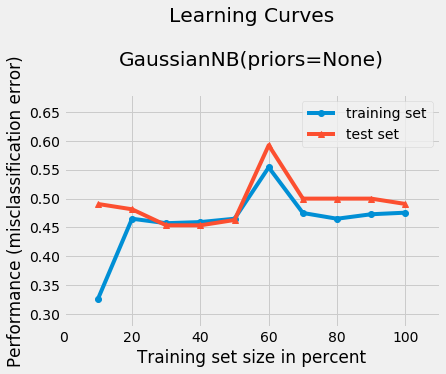

In [158]:
plot_learning_curves(X_train, y_train, X_validation,y_validation,clf=model)
plt.show()

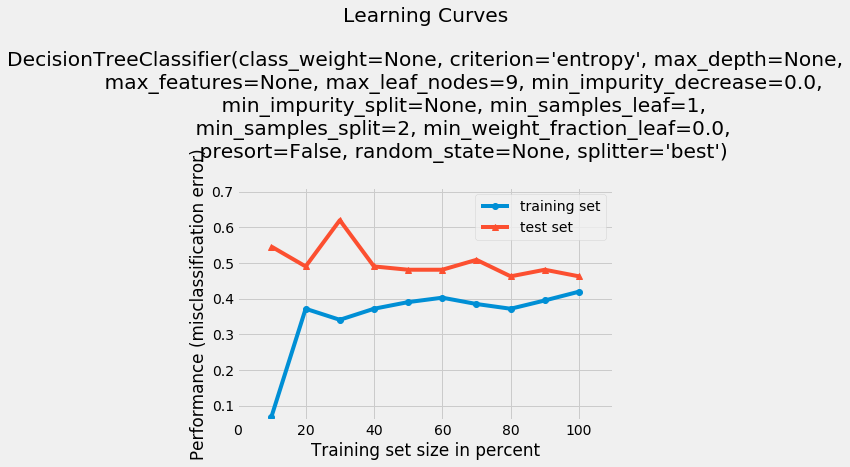

In [161]:
plot_learning_curves(X_train, y_train, X_validation,y_validation,clf=dt4_maxleaf9)
plt.show()

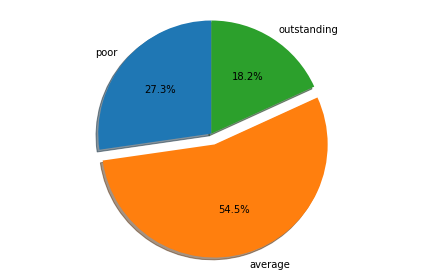

In [162]:
import matplotlib.pyplot as plt

# Pie chart
labels = ['poor','average','outstanding']
sizes = [15, 30, 10]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()